In [40]:
! pip install data-gradients &> /dev/null

In [41]:
! pip install roboflow

In [42]:
# for displaying pdfs and images in the notebook
! pip install pdf2image
! apt-get install poppler-utils

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
poppler-utils is already the newest version (22.02.0-2ubuntu0.4).
0 upgraded, 0 newly installed, 0 to remove and 45 not upgraded.


In [43]:
! pip install Pygments

In [44]:
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="kG3aHU8MnRNQXM22LwxK")
project = rf.workspace("thesis-yczhj").project("thyroid-cancer-detection-j8r8b")
version = project.version(3)
dataset = version.download("yolov5")


loading Roboflow workspace...
loading Roboflow project...


In [45]:
import yaml

# define the path to your YAML file
yaml_file_path = '/content/Thyroid-Cancer-Detection-3/data.yaml'

# open the YAML file and load it into a dictionary
with open(yaml_file_path, 'r') as f:
  data_yaml = yaml.safe_load(f)

In [46]:
dataset_params = {
    'data_dir': '/content/Thyroid-Cancer-Detection-3',
    'train_images_dir': 'train/images',
    'train_labels_dir': 'train/labels',
    'val_images_dir': 'valid/images',
    'val_labels_dir': 'valid/labels',
    'test_images_dir': 'test/images',
    'test_labels_dir': 'test/labels',
    'classes': ['1']
}


In [47]:
from data_gradients.datasets.detection import YoloFormatDetectionDataset

train_set = YoloFormatDetectionDataset(root_dir = '/content/Thyroid-Cancer-Detection-3' ,
                                       images_dir = "train/images" ,
                                       labels_dir = "train/labels")

val_set = YoloFormatDetectionDataset(root_dir = '/content/Thyroid-Cancer-Detection-3' ,
                                       images_dir = "valid/images" ,
                                       labels_dir = "valid/labels")


In [48]:
from data_gradients.managers.detection_manager import DetectionAnalysisManager

import matplotlib
matplotlib.use('Agg') # This line is only for Colab

analyzer = DetectionAnalysisManager(
        report_title="BDD Subset Example",
        train_data=train_set,
        val_data=val_set,
        class_names= ['1'],


    )

analyzer.run()

  - Executing analysis with: 
  - batches_early_stop: None 
  - len(train_data): 364 
  - len(val_data): 117 
  - log directory: /content/logs/BDD_Subset_Example 
  - Archive directory: /content/logs/BDD_Subset_Example/archive_20240605-065126 
  - feature extractor list: {'Image Features': [SummaryStats, ImagesResolution, ImageColorDistribution, ImagesAverageBrightness], 'Object Detection Features': [DetectionClassHeatmap, DetectionBoundingBoxArea, DetectionBoundingBoxPerImageCount, DetectionBoundingBoxSize, DetectionClassFrequency, DetectionClassesPerImageCount, DetectionBoundingBoxIoU, DetectionResizeImpact]}
╔══════════════════════════════════════════════════════════════════════════╗
║  To better understand how to tackle the data issues highlighted in this  ║
║  report, explore our comprehensive course on analyzing computer vision   ║
║  datasets. click here: https://hubs.ly/Q01XpHBT0                         ║
╚════════════════════════════════════════════════════════════════════════

Analyzing... :   0%|          | 0/364 [00:00<?, ?it/s]


--------------------------------------------------------------------------------
In which format are your images loaded ?
--------------------------------------------------------------------------------

Options:
[0] | RGB
[1] | BGR
[2] | LAB
[3] | Other

Your selection (Enter the corresponding number) >>> 0
Great! You chose: `RGB`

--------------------------------------------------------------------------------
Which comes first in your annotations, the class id or the bounding box?
--------------------------------------------------------------------------------
Here's a sample of how your labels look like:
Each line corresponds to a bounding box.
tensor([[6.0000, 0.0492, 0.1992, 0.0781, 0.1133],
        [6.0000, 0.4898, 0.6727, 0.1484, 0.1047],
        [6.0000, 0.3547, 0.2008, 0.0945, 0.0984],
        [6.0000, 0.3992, 0.2875, 0.1109, 0.1000]], dtype=torch.float64)
Options:
[0] | Label comes first (e.g. [class_id, x1, y1, x2, y2])
[1] | Bounding box comes first (e.g. [x1, y1, x2, y2,

Analyzing... :   1%|          | 3/364 [00:51<1:19:48, 13.26s/it]

Great! You chose: `xywh: x-left, y-top, width, height			(COCO format)`


Summarizing... :  50%|█████     | 1/2 [00:04<00:04,  4.07s/it]

The `bw` parameter is deprecated in favor of `bw_method`/`bw_adjust`.
Setting `bw_method=0.4`, but please see docs for the new parameters
and update your code. This will become an error in seaborn v0.15.0.



The `bw` parameter is deprecated in favor of `bw_method`/`bw_adjust`.
Setting `bw_method=0.4`, but please see docs for the new parameters
and update your code. This will become an error in seaborn v0.15.0.

More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
Summarizing... : 100%|██████████| 2/2 [00:12<00:00,  6.45s/it]


Dataset successfully analyzed!
Starting to write the report, this may take around 10 seconds...

Your dataset evaluation has been completed!

----------------------------------------------------------------------------------------------------
Training Configuration...
`DetectionDataConfig` cache is not enabled because `cache_path=None` was not set.

----------------------------------------------------------------------------------------------------
Report Location:
    - Temporary Folder (will be overwritten next run):
        └─ /content/logs/BDD_Subset_Example
                ├─ Report.pdf
                └─ summary.json
    - Archive Folder:
        └─ /content/logs/BDD_Subset_Example/archive_20240605-065126
                ├─ Report.pdf
                └─ summary.json

Seen a glitch? Have a suggestion? Visit https://github.com/Deci-AI/data-gradients !


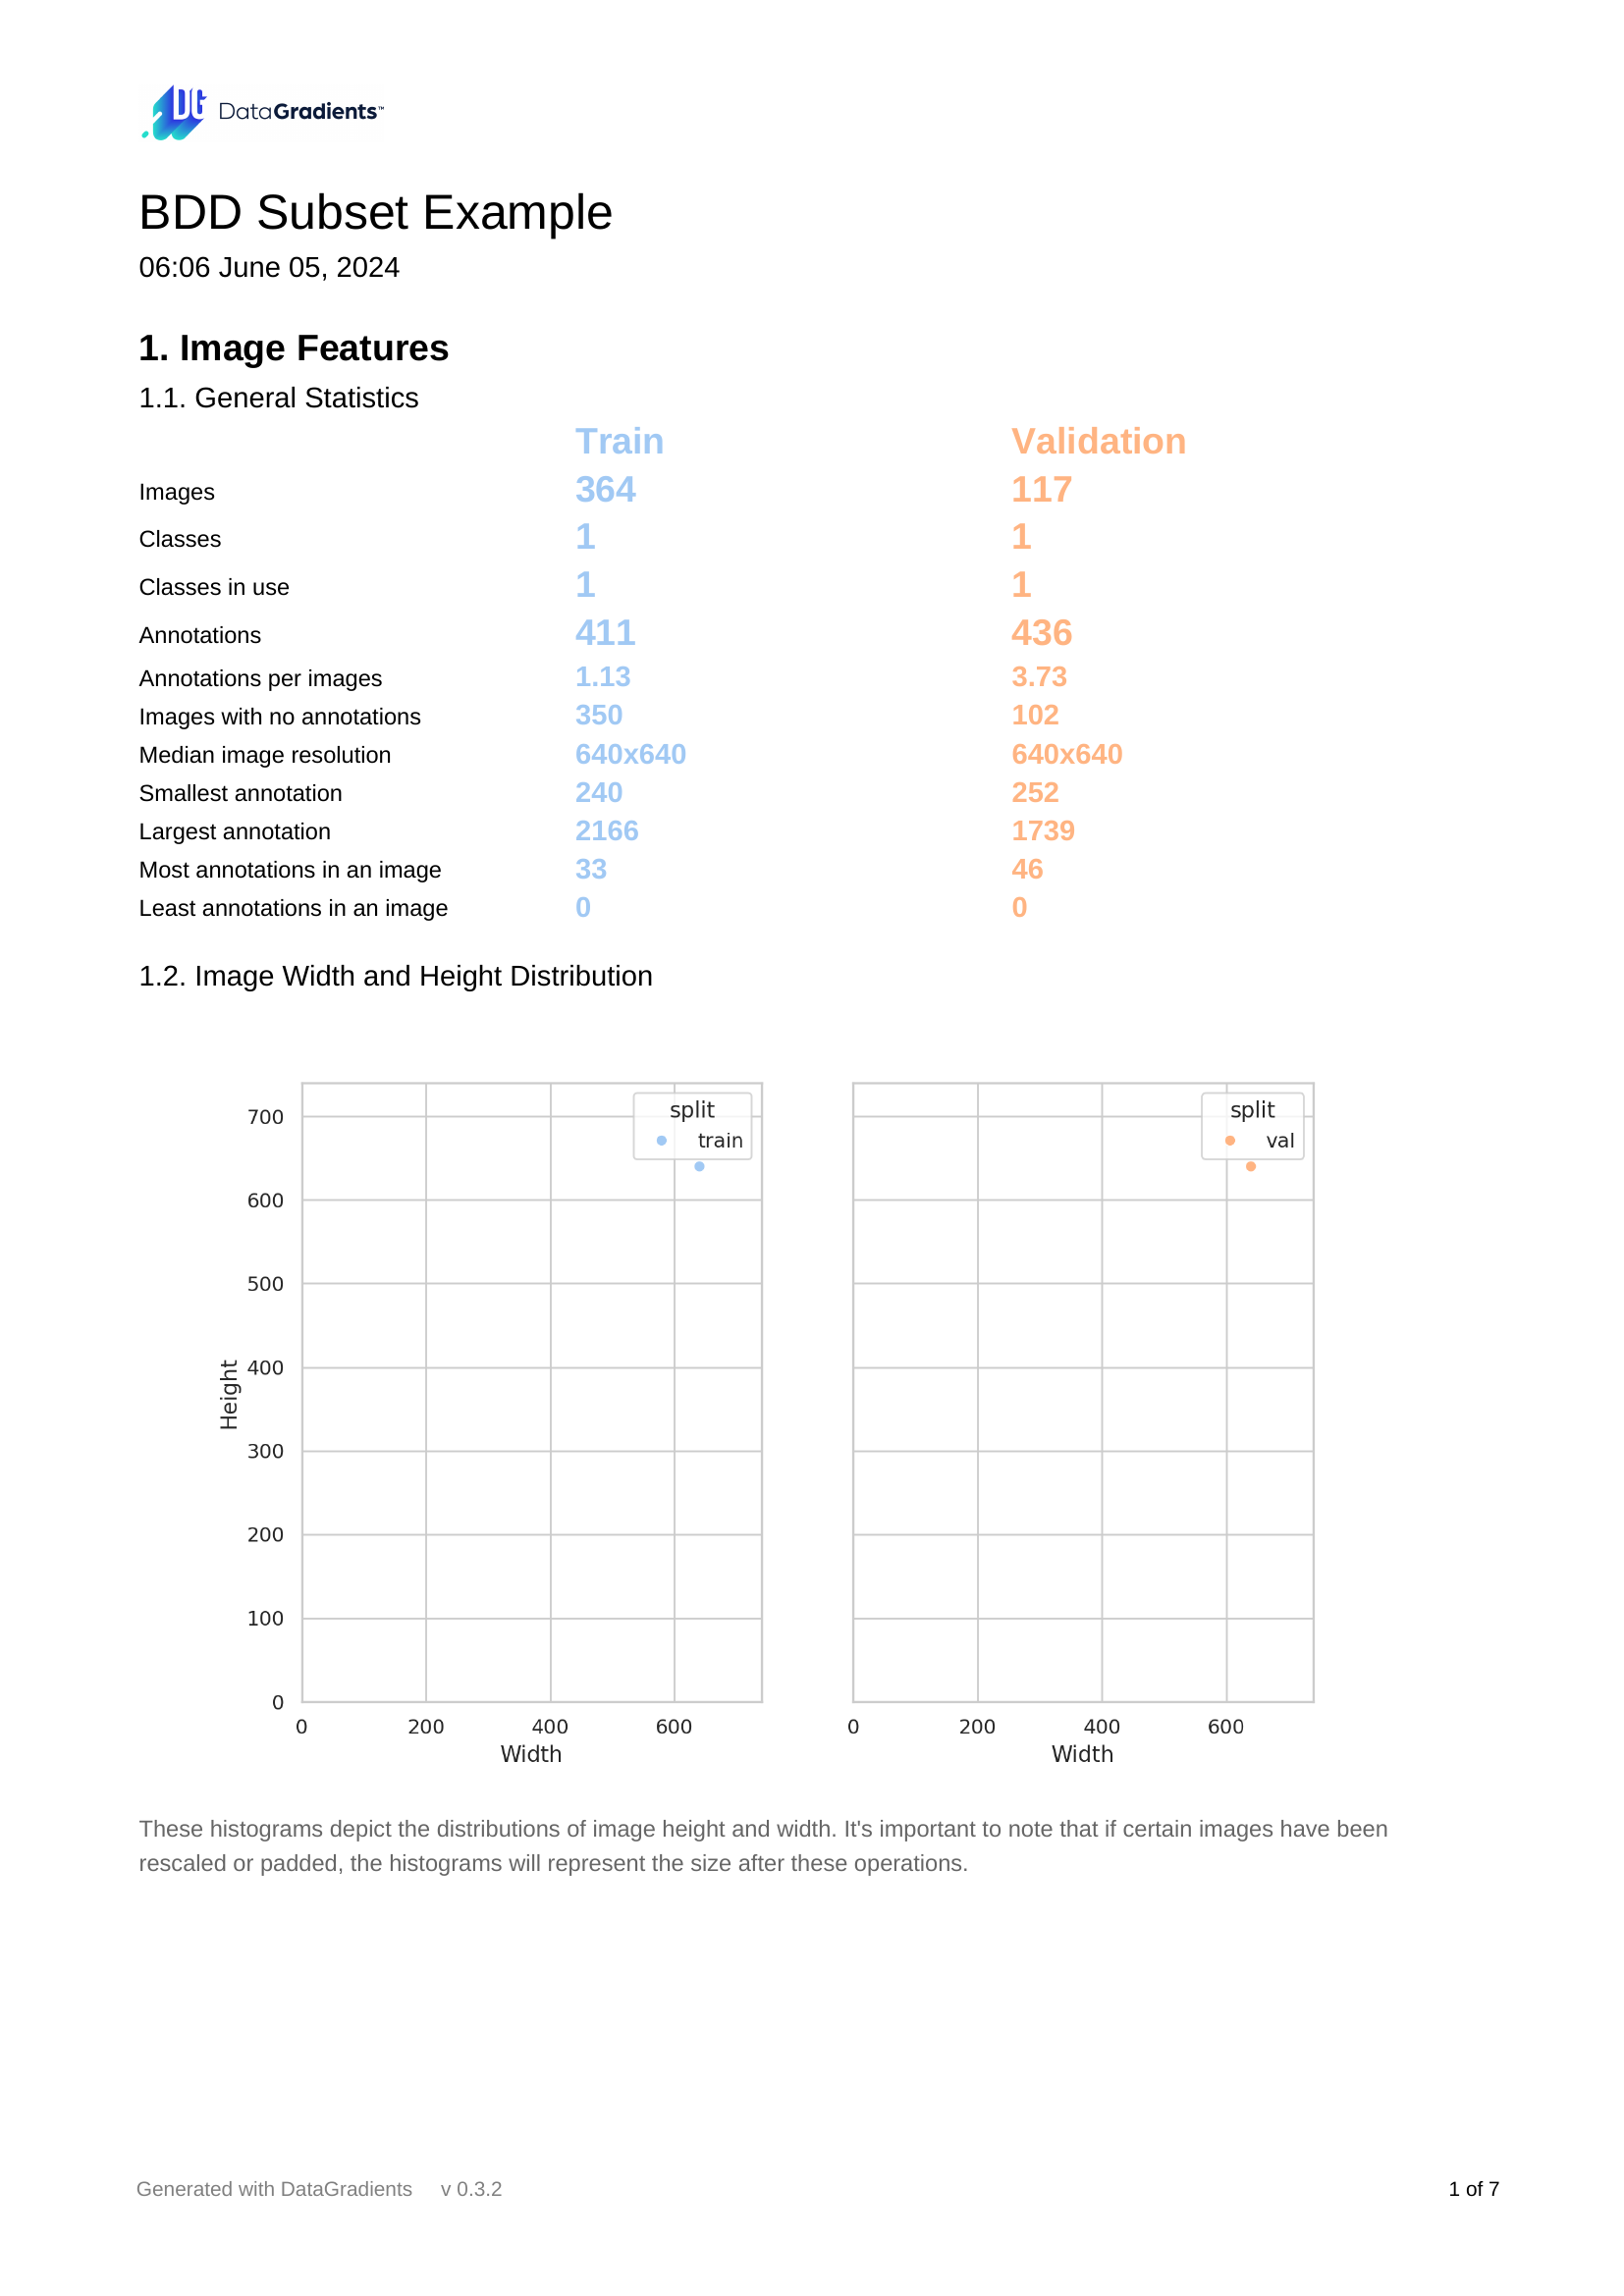

In [58]:
from pdf2image import convert_from_path

images = convert_from_path("/content/logs/BDD_Subset_Example/Report.pdf")
images[0]


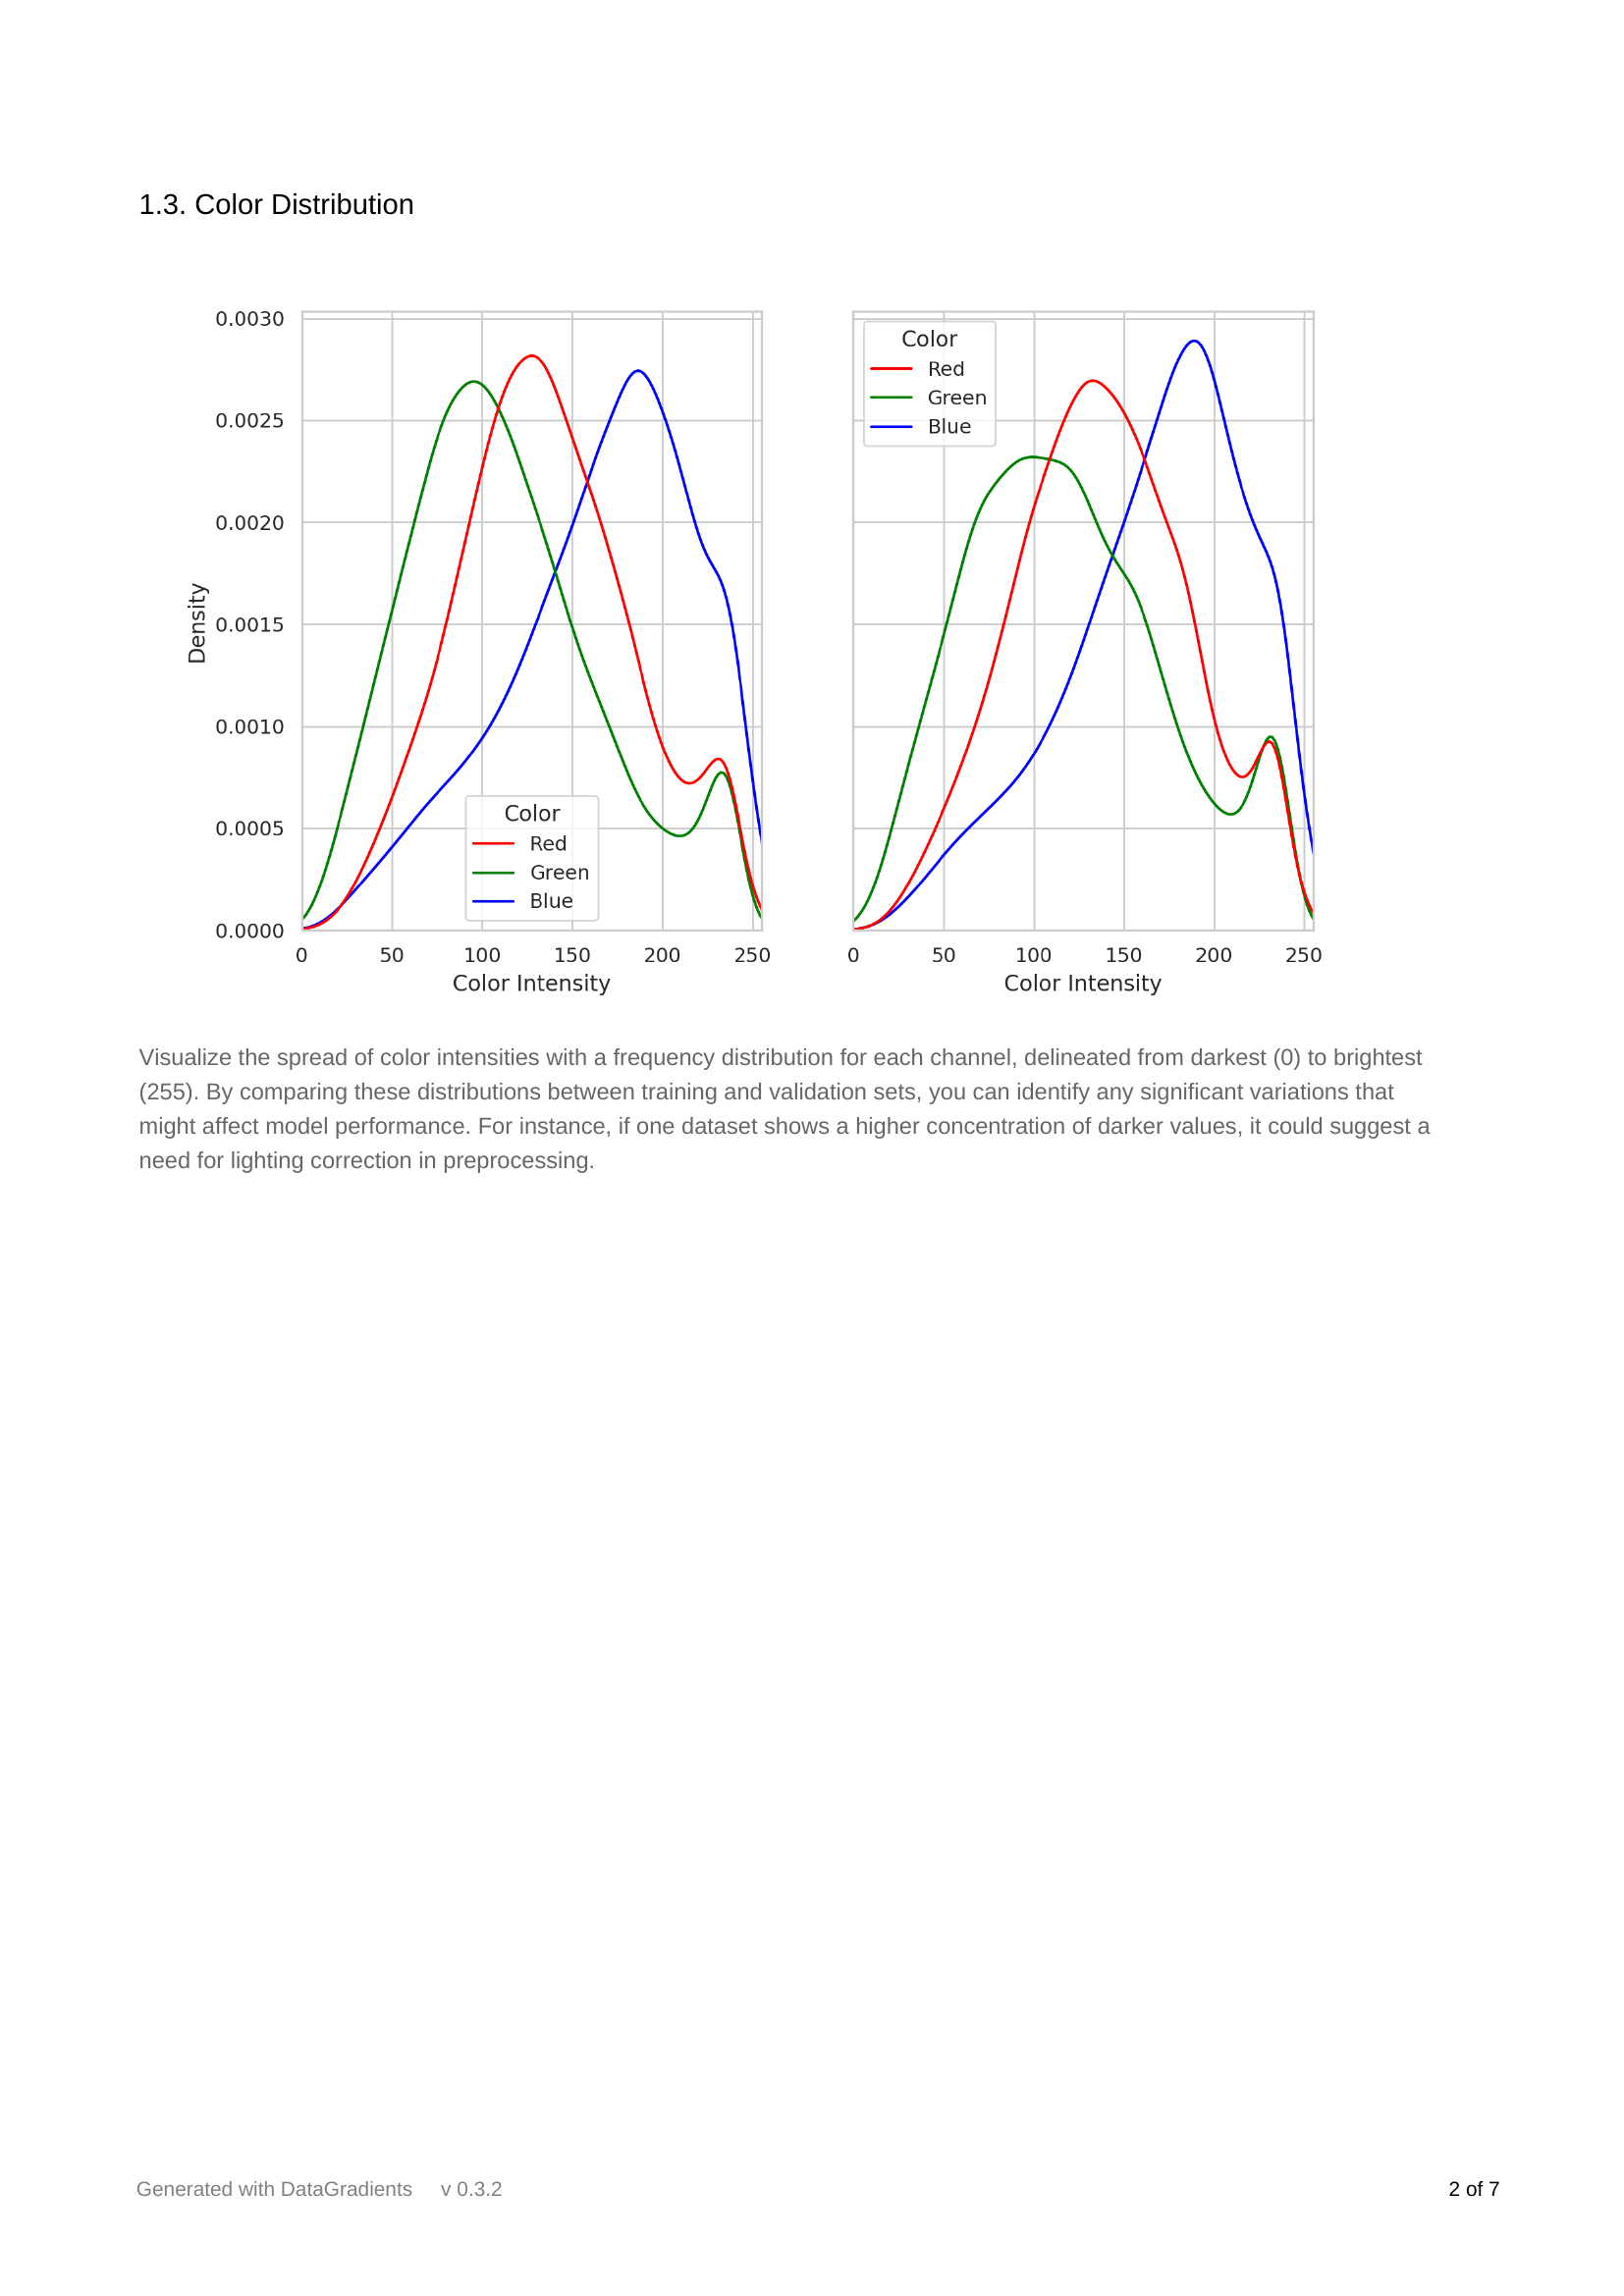

In [59]:
images[1]


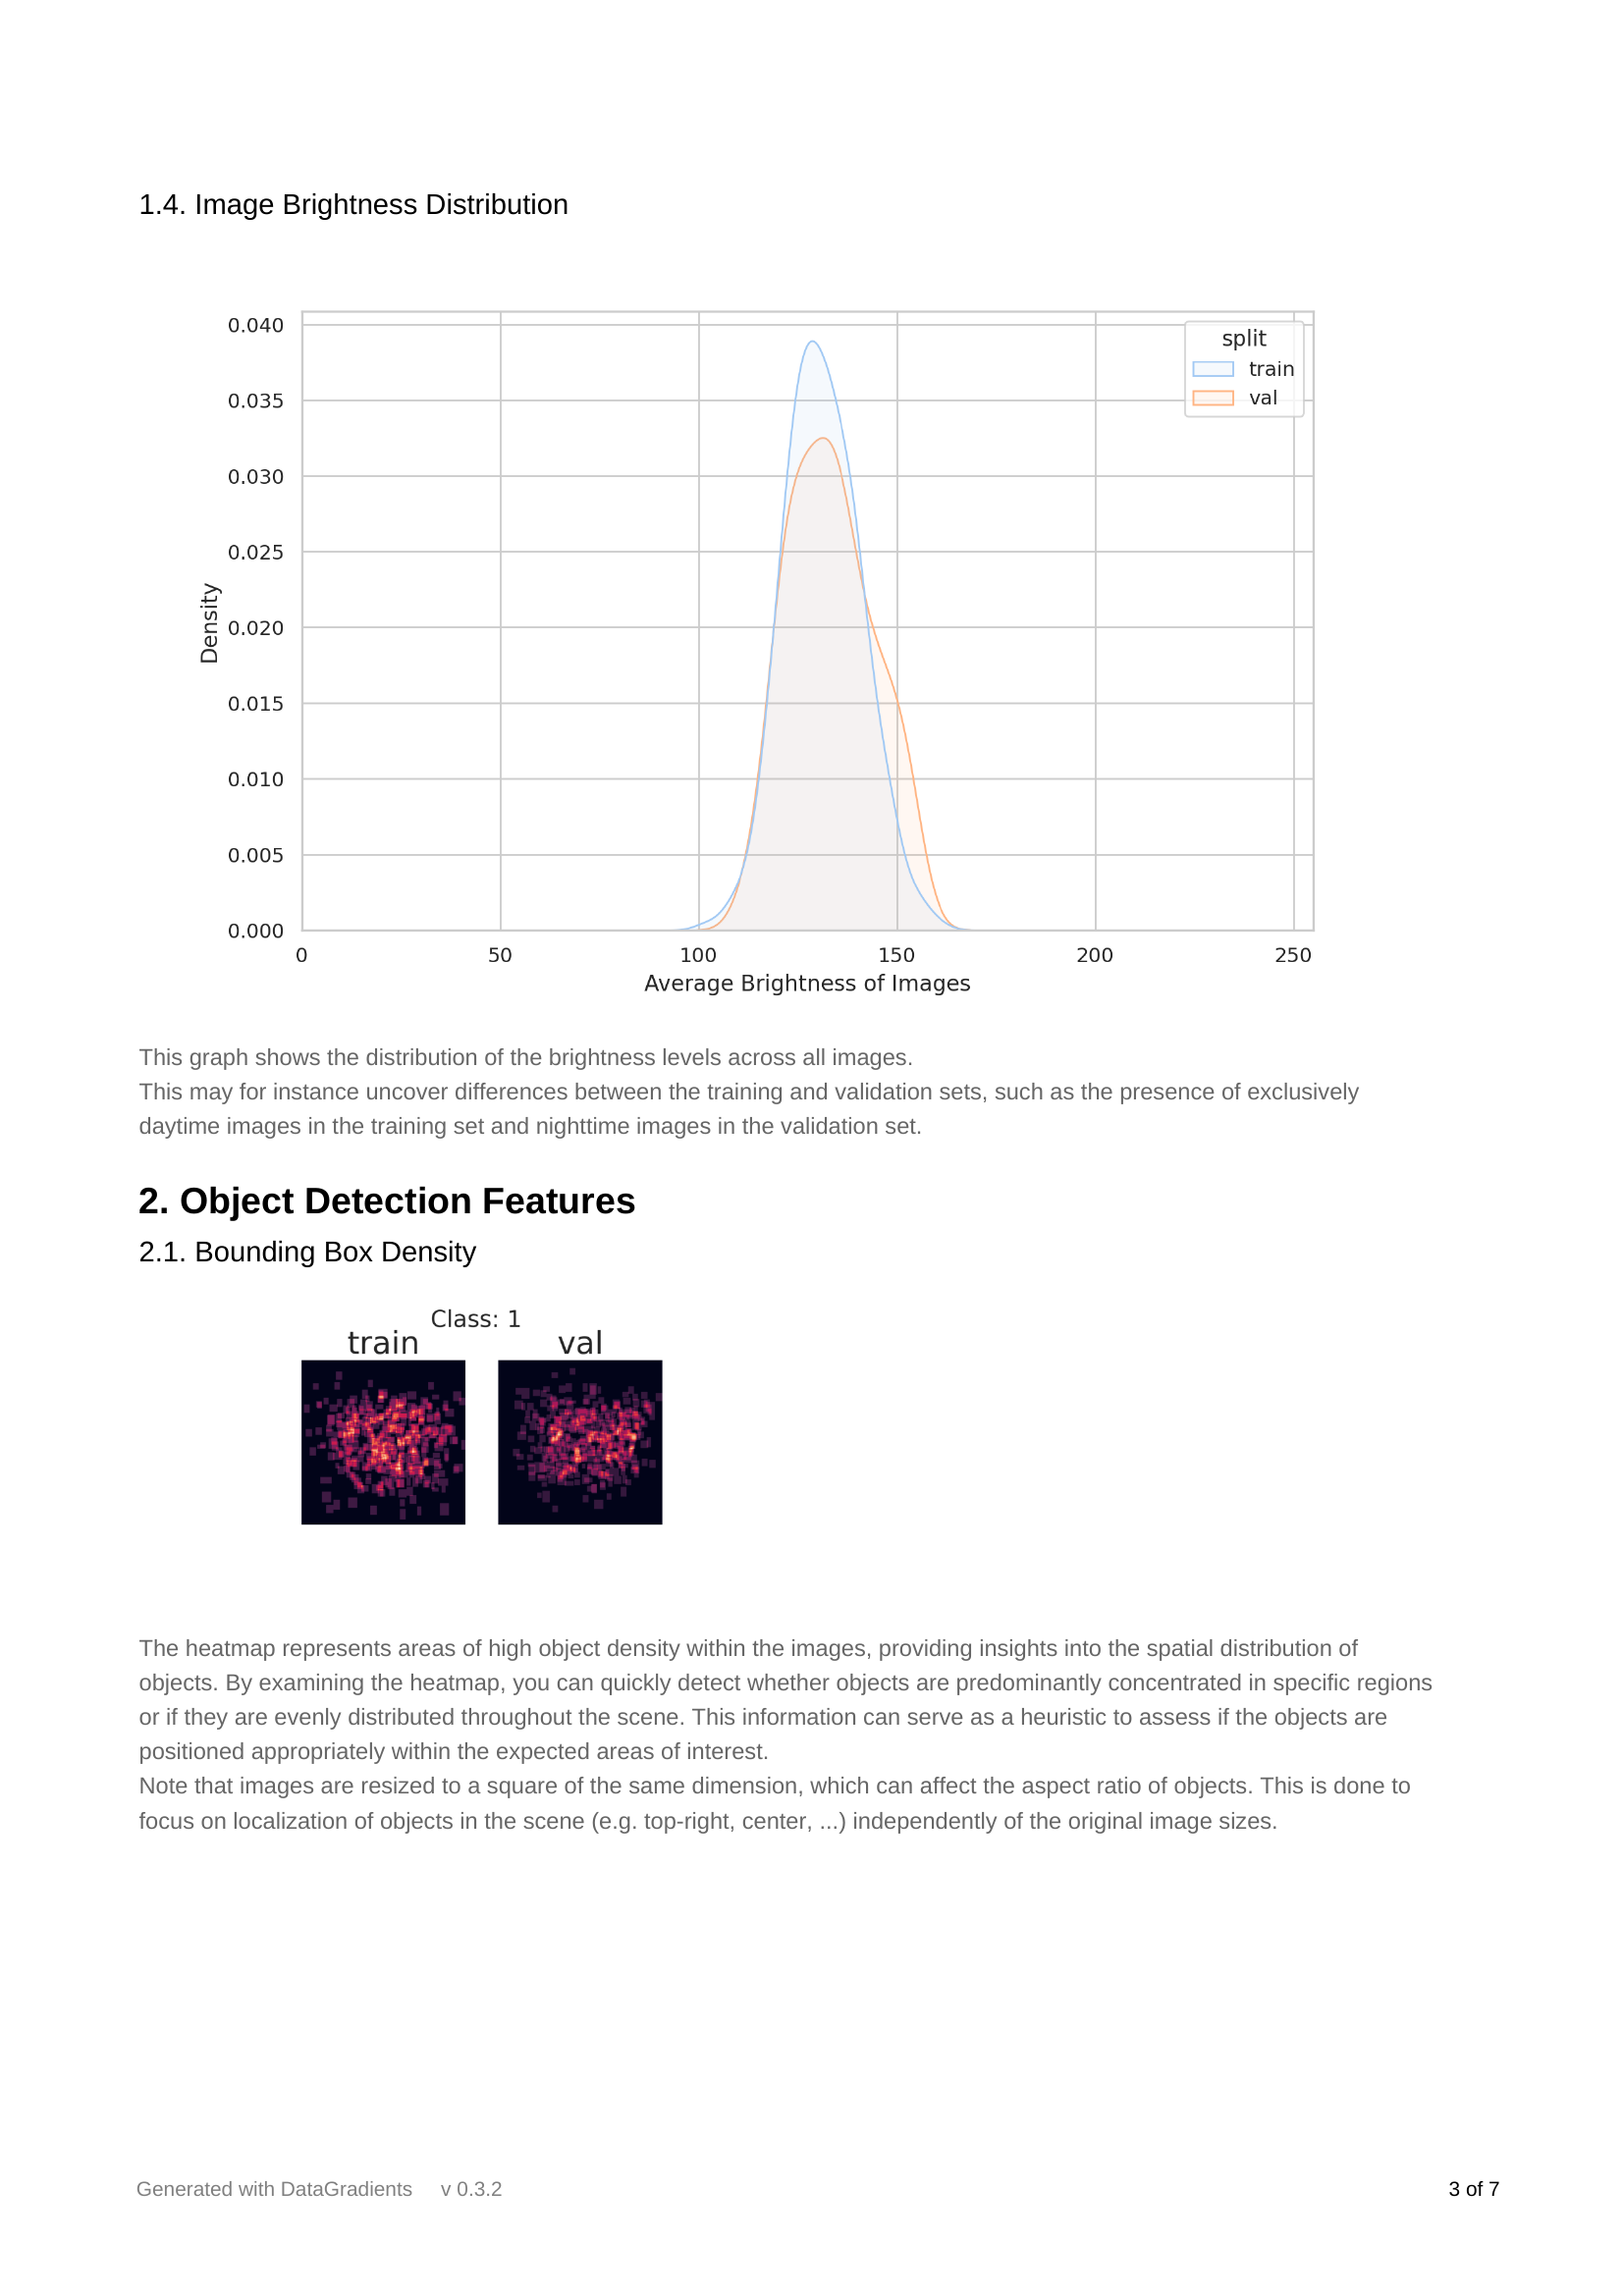

In [60]:
images[2]


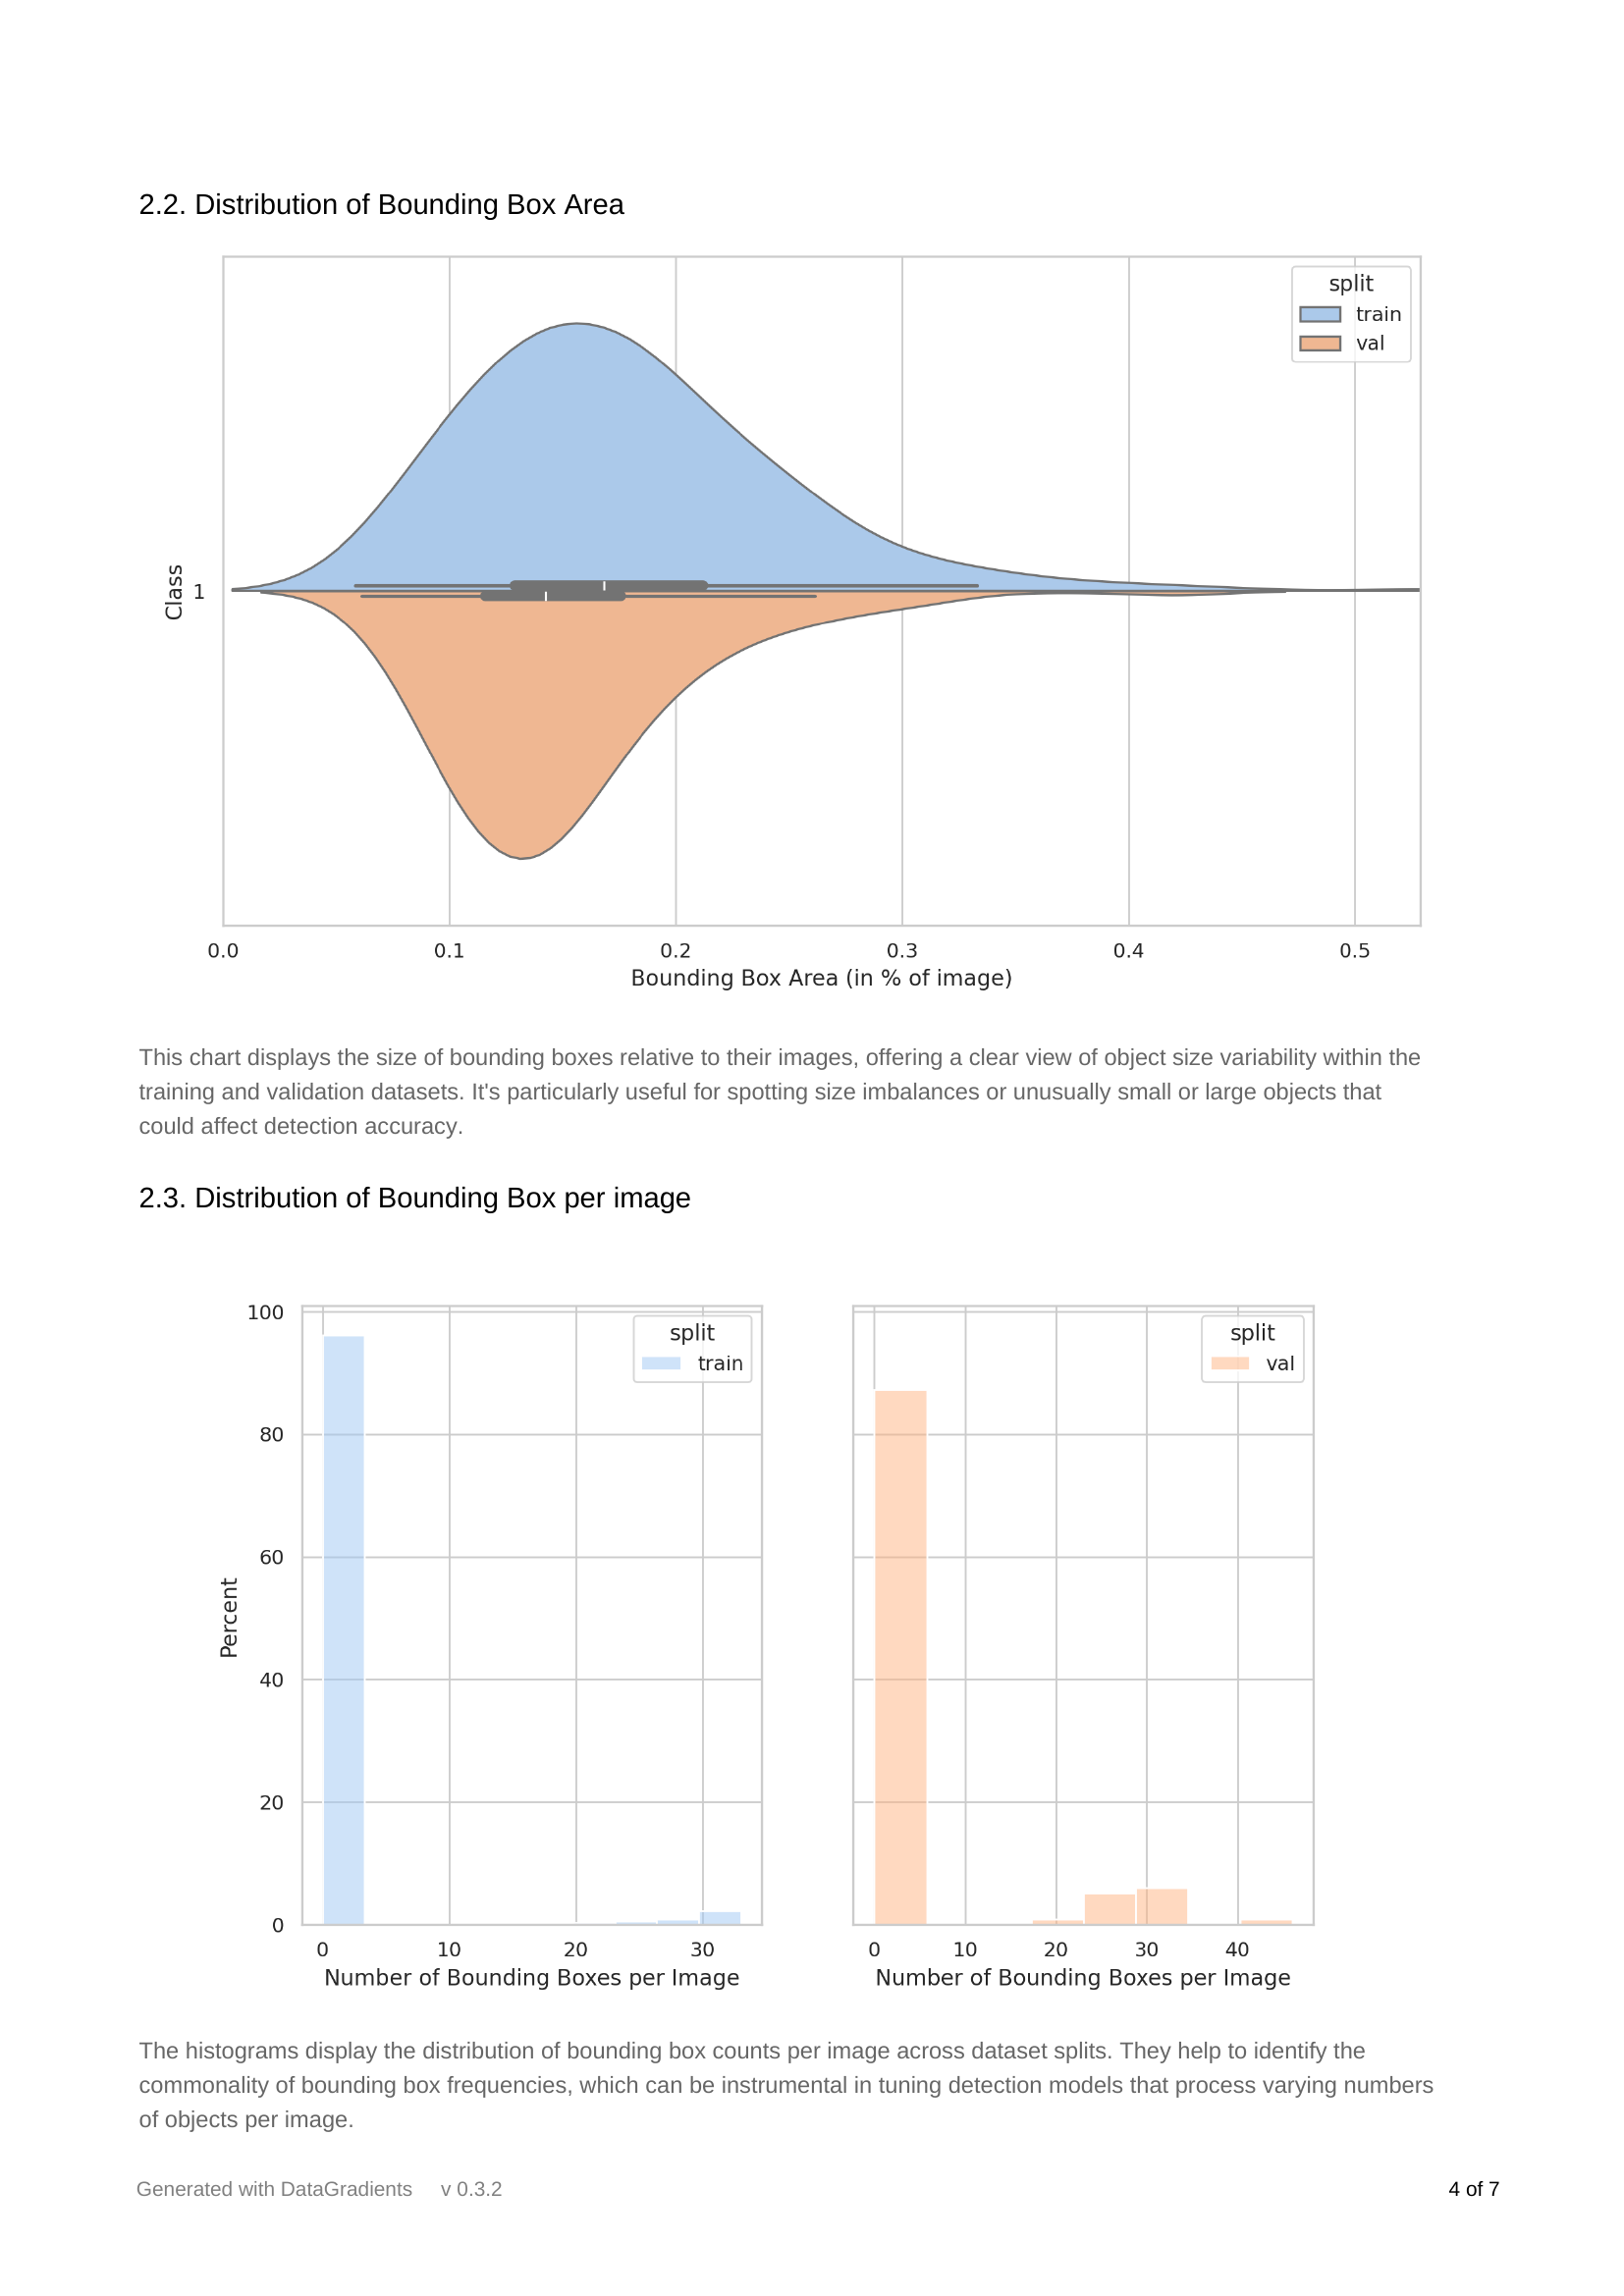

In [61]:
images[3]


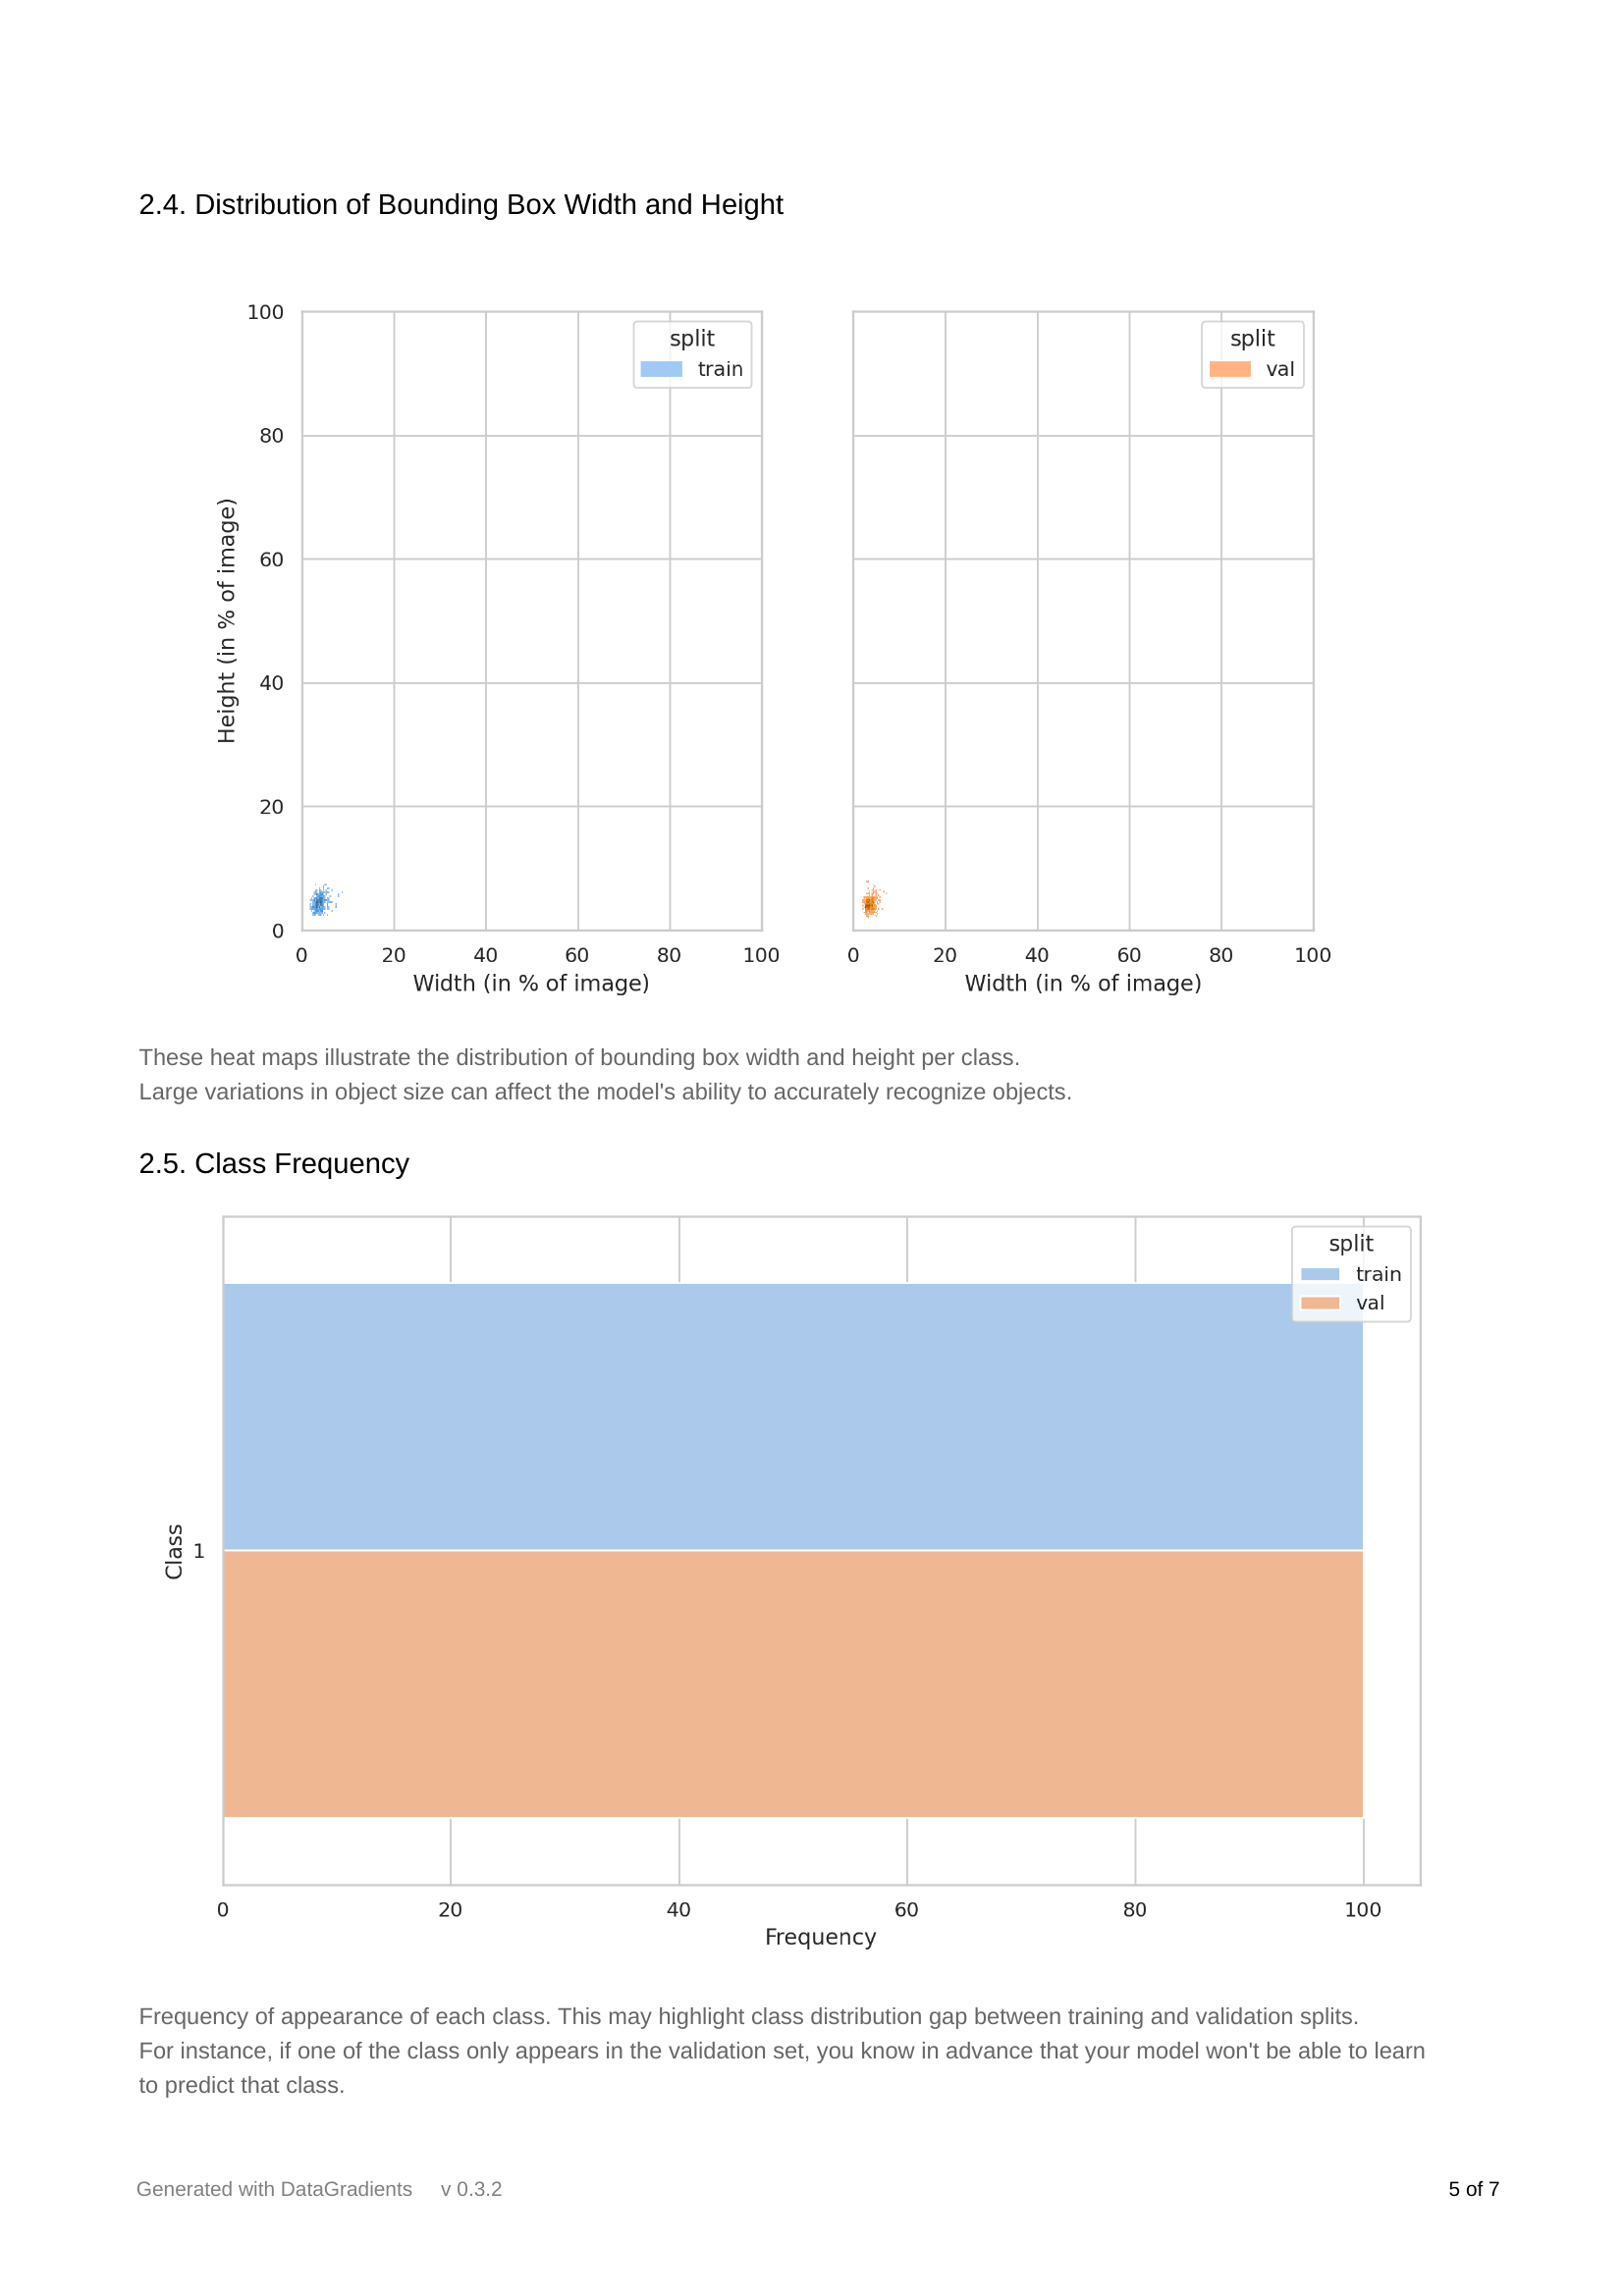

In [62]:
images[4]

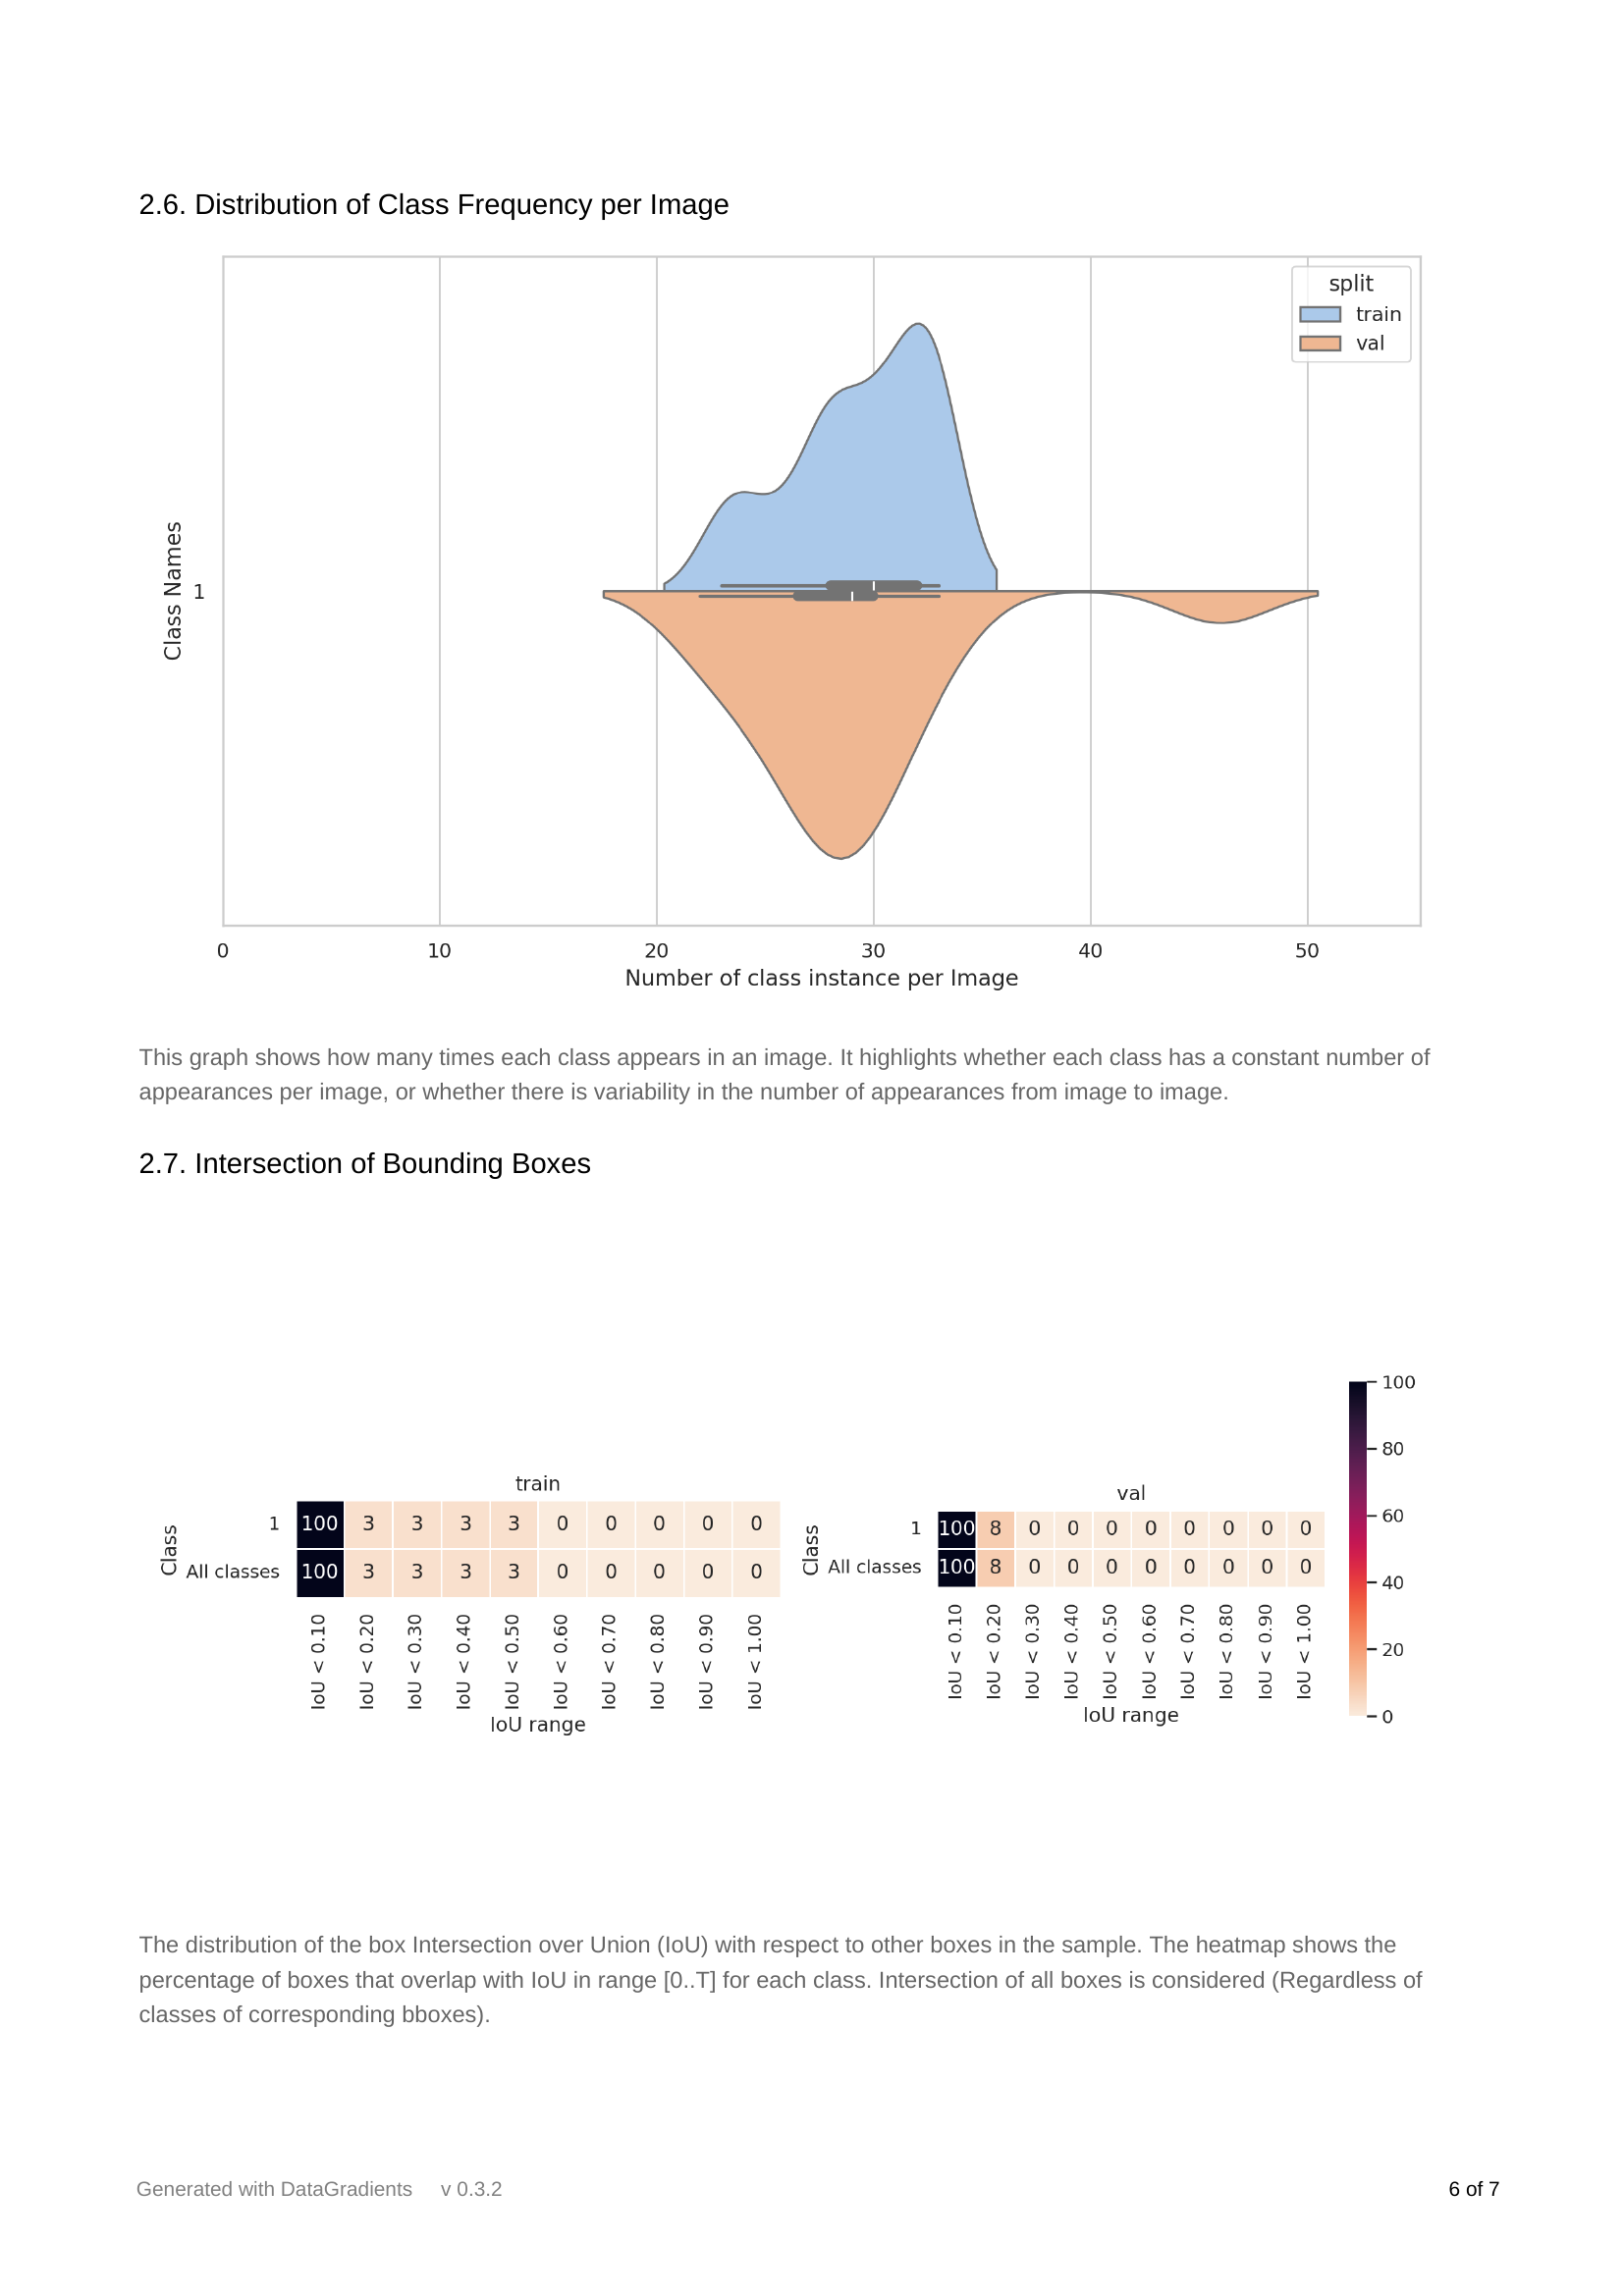

In [63]:
images[5]


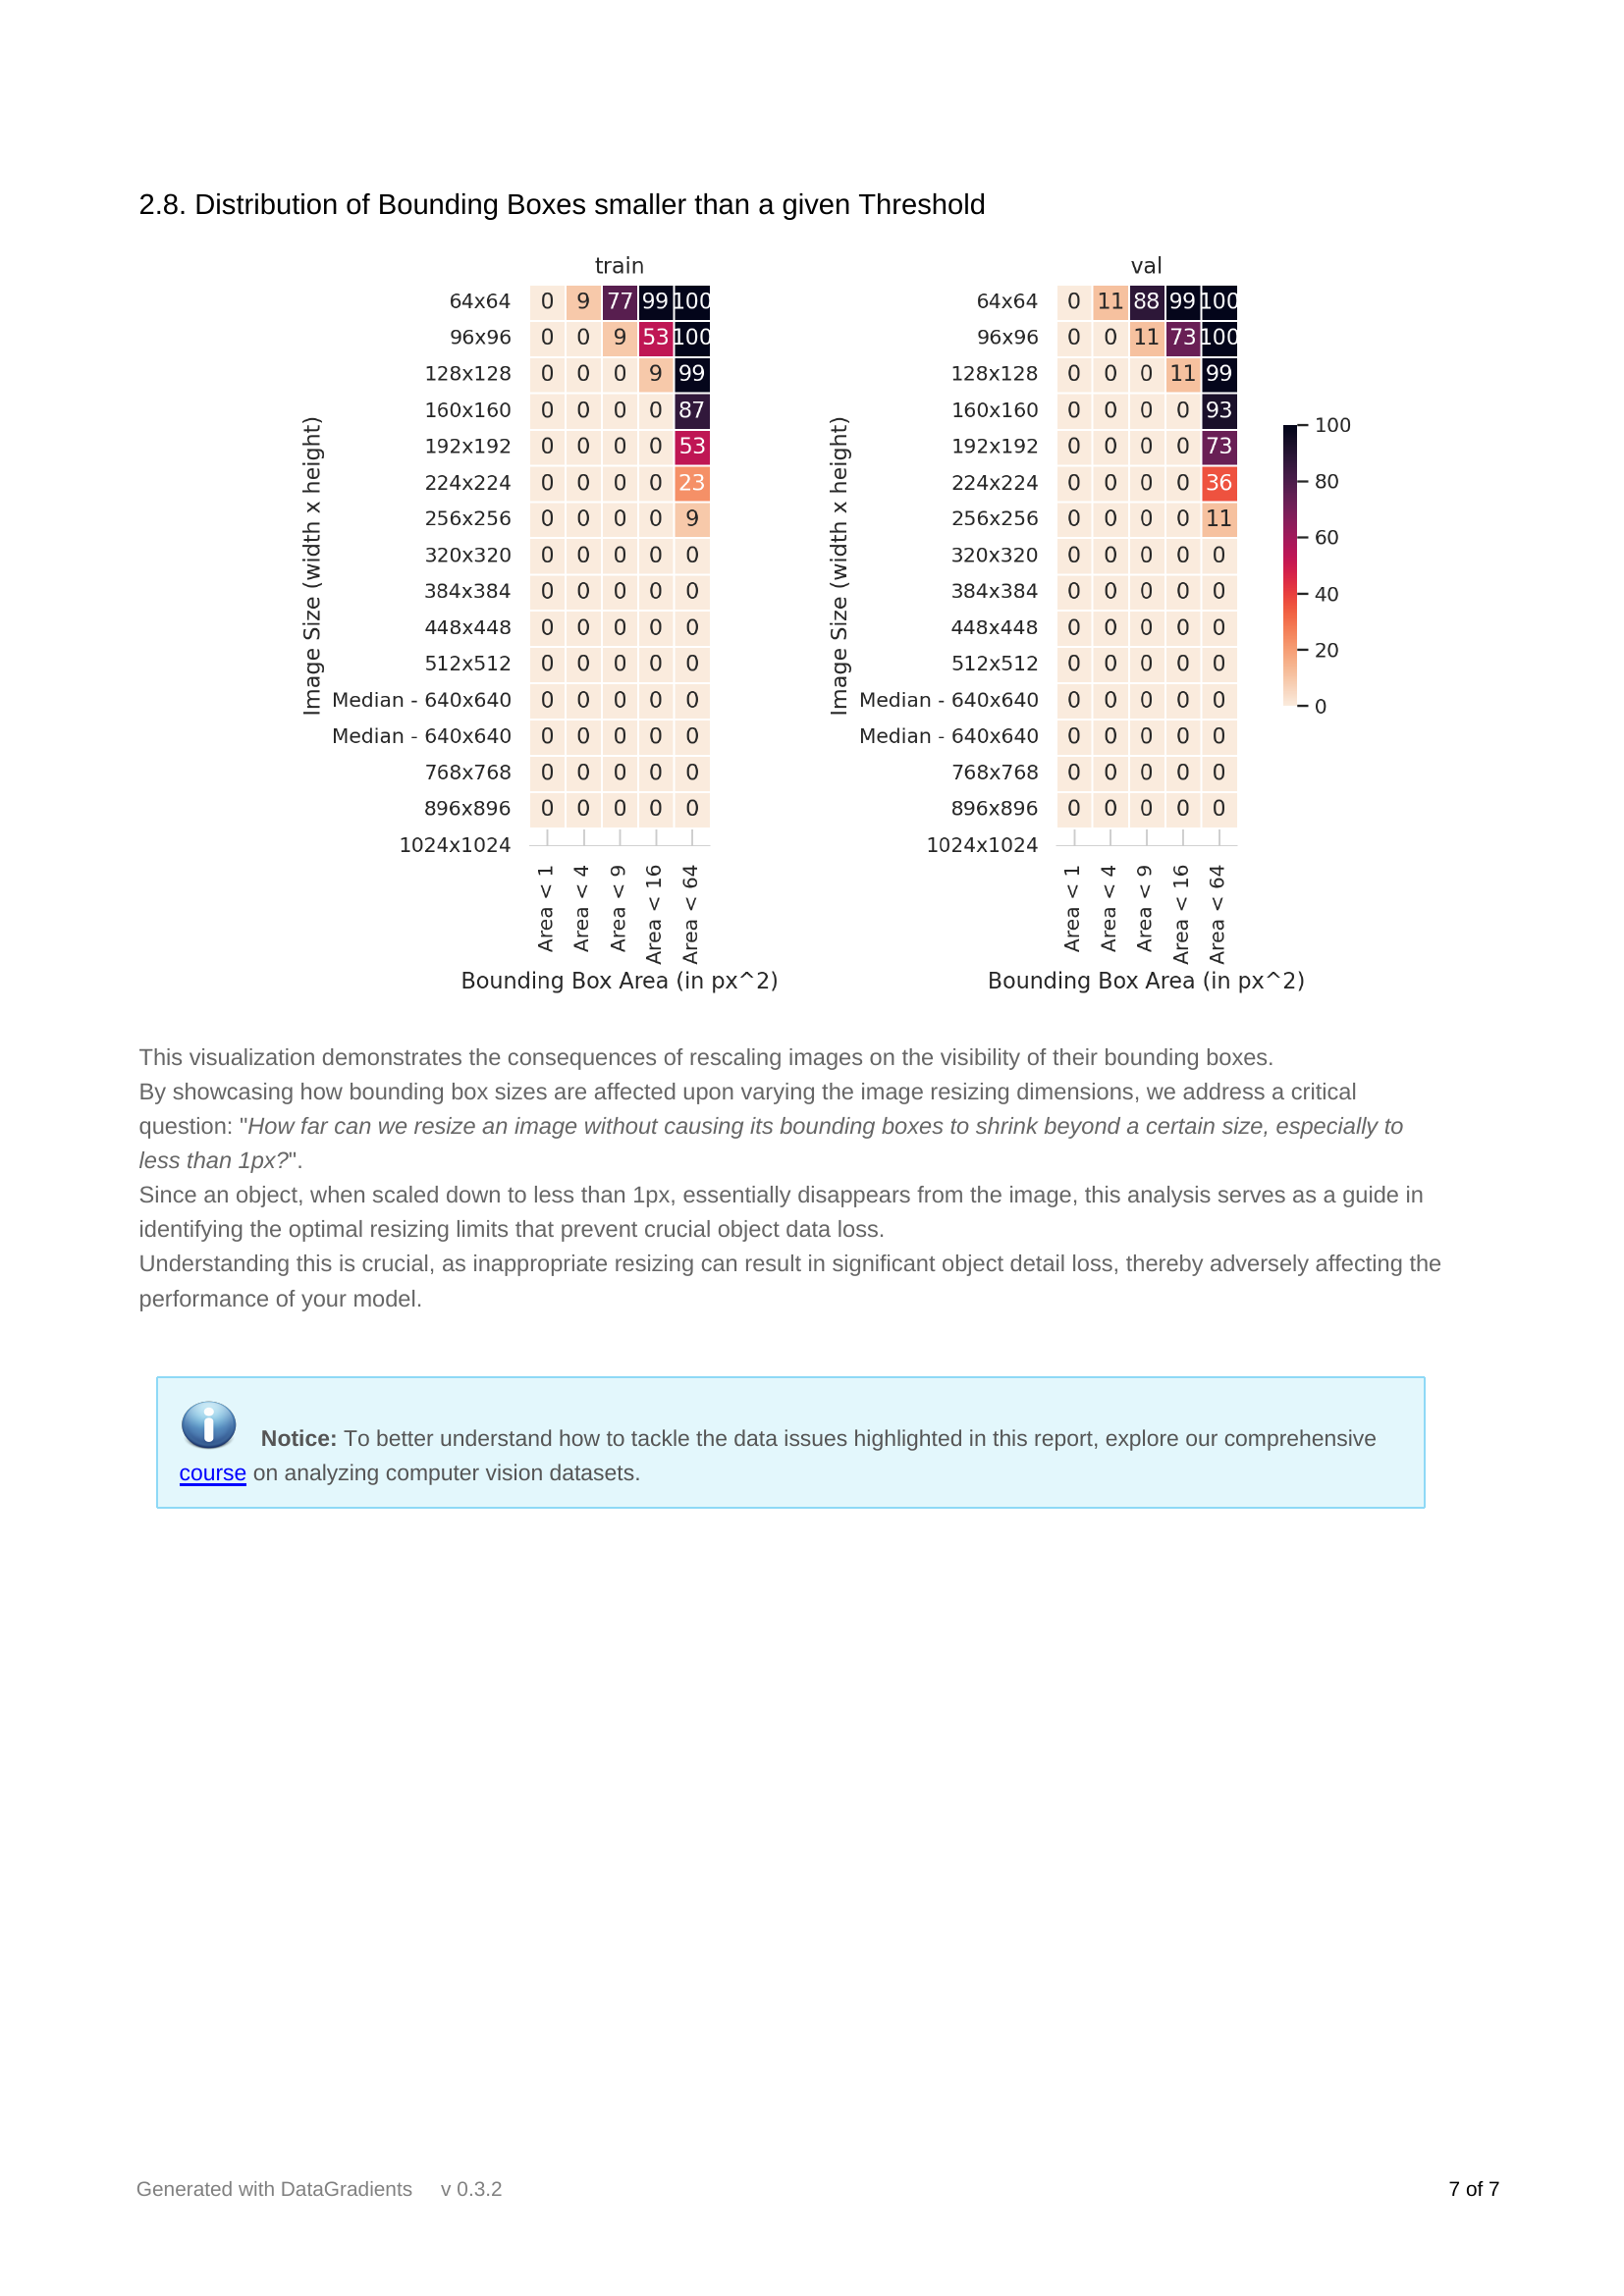

In [64]:
 images[6]


In [ ]:
from google.colab import drive
drive.mount('/content/drive')